In [42]:
import numpy as np
import matplotlib as plt
import os
import math
import shutil
import glob

In [43]:
#count the number of images in the respective classes in the Training Folder
root_dir = "/Users/vedch/Desktop/Cancer detection/archive/Training"
number_of_images = {}

for dir in os.listdir(root_dir):
    number_of_images[dir] = len(os.listdir(os.path.join(root_dir,dir)))

In [44]:
number_of_images.items()

dict_items([('Brain Tumor', 3418), ('Healthy', 1295)])

### Model Building

In [45]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [46]:
#CNN Model

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation = 'relu', input_shape = (224,224,3)))

model.add(Conv2D(filters = 36, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Dropout(rate = 0.25)) #this is used to reduce overfitting and increase generalization while training

model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 36)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 52, 52, 128)      

In [47]:
model.compile(optimizer='adam', loss=keras.losses.binary_crossentropy, metrics=['accuracy'])

### Preparing our data using Data Generator

In [48]:
def preprocessingImages(path):
    """ 
    input = path
    output = pre processed images
    """
    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale= 1/255, horizontal_flip= True)
    image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode = 'binary')

    return image


In [49]:
path = "/Users/vedch/Desktop/Cancer detection/archive/Training"
train_data = preprocessingImages(path)

Found 4713 images belonging to 2 classes.


In [50]:
def preprocessingImages_natural(path):
    """ 
    input = path
    output = pre processed images
    """
    image_data = ImageDataGenerator(rescale= 1/255) #we want the data to be as natural as possible
    image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode = 'binary')

    return image

In [51]:
path = "/Users/vedch/Desktop/Cancer detection/archive/Testing"
test_data = preprocessingImages_natural(path)

Found 1311 images belonging to 2 classes.


In [52]:
path = "/Users/vedch/Desktop/Cancer detection/archive/Validation"
validation_data = preprocessingImages_natural(path)

Found 999 images belonging to 2 classes.


In [53]:
#early stopping and model checkpoint

from keras.callbacks import ModelCheckpoint, EarlyStopping

#early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta = 0.01, patience= 5, verbose = 1, mode = 'auto')

#model checkpoint

mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose = 1, save_best_only = True, mode = 'auto')

cd = [es,mc]

### Model Training

In [54]:
hs = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs = 30, validation_data= validation_data, validation_steps=16, callbacks = cd)

C:\Users\vedch\AppData\Local\Temp\ipykernel_64884\3165629192.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hs = model.fit_generator(generator=train_data, steps_per_epoch=8, epochs = 30, validation_data= validation_data, validation_steps=16, callbacks = cd)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 0.8012 - accuracy: 0.6328
Epoch 1: val_accuracy improved from -inf to 0.71289, saving model to .\bestmodel.h5
8/8 [==============================] - 25s 3s/step - loss: 0.8012 - accuracy: 0.6328 - val_loss: 0.6393 - val_accuracy: 0.7129
Epoch 2/30


c:\Users\vedch\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 0.6111 - accuracy: 0.7617
Epoch 2: val_accuracy improved from 0.71289 to 0.83984, saving model to .\bestmodel.h5
8/8 [==============================] - 20s 3s/step - loss: 0.6111 - accuracy: 0.7617 - val_loss: 0.5199 - val_accuracy: 0.8398
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.5093 - accuracy: 0.7891
Epoch 3: val_accuracy improved from 0.83984 to 0.86914, saving model to .\bestmodel.h5
8/8 [==============================] - 17s 2s/step - loss: 0.5093 - accuracy: 0.7891 - val_loss: 0.3601 - val_accuracy: 0.8691
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 0.3767 - accuracy: 0.8359
Epoch 4: val_accuracy did not improve from 0.86914
8/8 [==============================] - 16s 2s/step - loss: 0.3767 - accuracy: 0.8359 - val_loss: 0.5455 - val_accuracy: 0.7168
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.2921 - accuracy: 0.8633
Epoch 5: val_accuracy improved from 0

In [55]:
#Graphical Representation of the Model

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

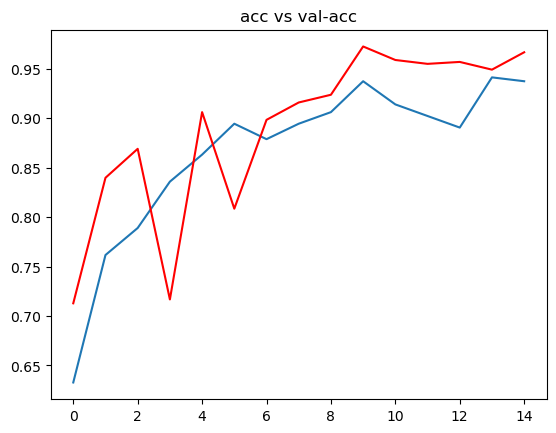

In [58]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title('acc vs val-acc')
plt.show()

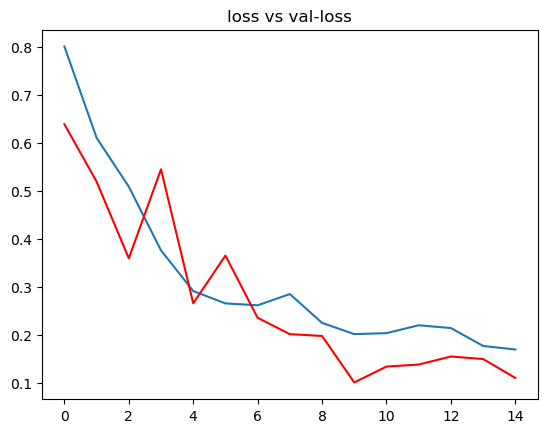

In [59]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title('loss vs val-loss')
plt.show()

In [60]:
#Model Accuracy

from keras.models import load_model

model = load_model("./bestmodel.h5")

### Model Accuracy

In [61]:
acc = model.evaluate_generator(test_data)[1]

print(f"The accuracy of our model is {acc*100}%")

C:\Users\vedch\AppData\Local\Temp\ipykernel_64884\1028936001.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


The accuracy of our model is 91.07551574707031%


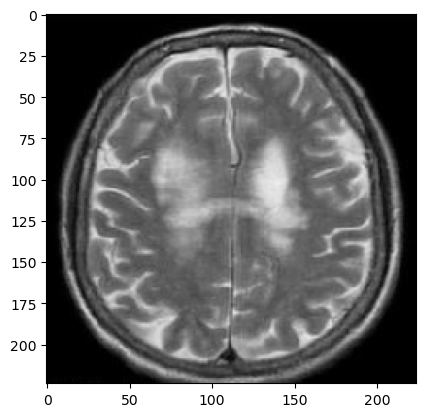

1/1 [==============================] - 0s 29ms/step
The MRI is not having a tumor


In [73]:
from keras.preprocessing.image import load_img, img_to_array
path = "/Users/vedch/Desktop/Cancer detection/archive/Testing/Healthy/Te-no_0014.jpg"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
predicted_classes = (pred > 0.5).astype(int)

if(predicted_classes == 0):
    print("The MRI is having a tumor")
else:
    print("The MRI is not having a tumor")


### Transfer Learning to Improve Accuracy

- Transfer learning is the improvement of learning in a new task through the transfer of knowledge from a related task that has already been learned

### MobileNet Model Architecture

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten, Dense
from keras.models import Model, load_model
from keras.applications.mobilenet import MobileNet, preprocess_input

In [75]:
base_model = MobileNet(input_shape = (224,224,3), include_top=False) #downloads the base model from the internet

17225924/17225924 [==============================] - 4s 0us/step


In [76]:
for layer in base_model.layers:
    layer.trainable = False

In [78]:
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

In [79]:
X = Flatten()(base_model.output)
X = Dense(units = 1, activation='sigmoid')(X)

model = Model(base_model.input, X)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128   

In [80]:
model.compile(optimizer='rmsprop', loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

In [81]:
#call backs

from keras.callbacks import ModelCheckpoint, EarlyStopping

mc = ModelCheckpoint(filepath="MNA_best_model.h5",monitor='val_accuracy', verbose = 1, save_best_only=True)

es = EarlyStopping(monitor = 'val_accuracy', min_delta=0.01, patience = 3, verbose = 1)

cb = [mc,es]

In [82]:
hist = model.fit_generator(train_data, steps_per_epoch=8, epochs = 30, validation_data=validation_data, validation_steps = 16, callbacks = cb)

C:\Users\vedch\AppData\Local\Temp\ipykernel_64884\3548119419.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data, steps_per_epoch=8, epochs = 30, validation_data=validation_data, validation_steps = 16, callbacks = cb)


Epoch 1/30
8/8 [==============================] - ETA: 0s - loss: 3.7223 - accuracy: 0.7695
Epoch 1: val_accuracy improved from -inf to 0.96289, saving model to MNA_best_model.h5
8/8 [==============================] - 13s 2s/step - loss: 3.7223 - accuracy: 0.7695 - val_loss: 0.5433 - val_accuracy: 0.9629
Epoch 2/30


c:\Users\vedch\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - ETA: 0s - loss: 0.4572 - accuracy: 0.9492
Epoch 2: val_accuracy improved from 0.96289 to 0.98047, saving model to MNA_best_model.h5
8/8 [==============================] - 12s 2s/step - loss: 0.4572 - accuracy: 0.9492 - val_loss: 0.1030 - val_accuracy: 0.9805
Epoch 3/30
8/8 [==============================] - ETA: 0s - loss: 0.4342 - accuracy: 0.9531
Epoch 3: val_accuracy did not improve from 0.98047
8/8 [==============================] - 12s 2s/step - loss: 0.4342 - accuracy: 0.9531 - val_loss: 0.1446 - val_accuracy: 0.9766
Epoch 4/30
8/8 [==============================] - ETA: 0s - loss: 1.4820 - accuracy: 0.8789
Epoch 4: val_accuracy did not improve from 0.98047
8/8 [==============================] - 11s 1s/step - loss: 1.4820 - accuracy: 0.8789 - val_loss: 0.4093 - val_accuracy: 0.9688
Epoch 5/30
8/8 [==============================] - ETA: 0s - loss: 0.3430 - accuracy: 0.9609
Epoch 5: val_accuracy did not improve from 0.98047
8/8 [==============

In [83]:
#load the best fit model

model = load_model("./MNA_best_model.h5")

In [84]:
acc = model.evaluate_generator(test_data)[1]

print(f"The model accuracy is {acc*100}%")

C:\Users\vedch\AppData\Local\Temp\ipykernel_64884\1294987017.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(test_data)[1]


The model accuracy is 94.88939642906189%


In [86]:
h = hist.history

h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

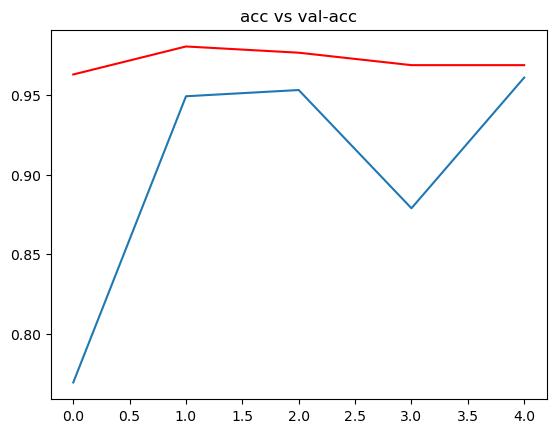

In [87]:
import matplotlib.pyplot as plt

plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')

plt.title('acc vs val-acc')
plt.show()

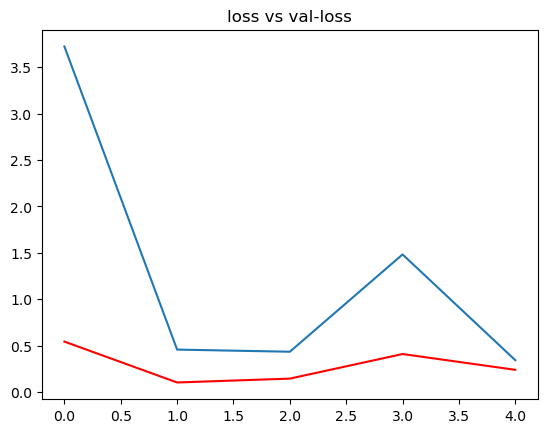

In [88]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')

plt.title('loss vs val-loss')
plt.show()

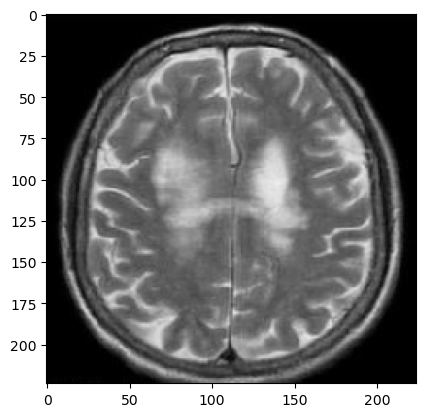

1/1 [==============================] - 0s 39ms/step
The MRI is not having a tumor


In [91]:
from keras.preprocessing.image import load_img, img_to_array
path = "/Users/vedch/Desktop/Cancer detection/archive/Testing/Healthy/Te-no_0014.jpg"

img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
predicted_classes = (pred > 0.5).astype(int)

if(predicted_classes == 0):
    print("The MRI is having a tumor")
else:
    print("The MRI is not having a tumor")